<a href="https://colab.research.google.com/github/gnbhub/gnb_2022_1_Ai_team1/blob/master/week3/miseongkim_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
housing = datasets.load_boston()

housing.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
data = pd.DataFrame(housing['data'], columns=housing['feature_names'])
target = pd.DataFrame(housing['target'], columns=['Target'])

print(data.shape)
print(target.shape)

(506, 13)
(506, 1)


In [7]:
df = pd.concat([data, target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

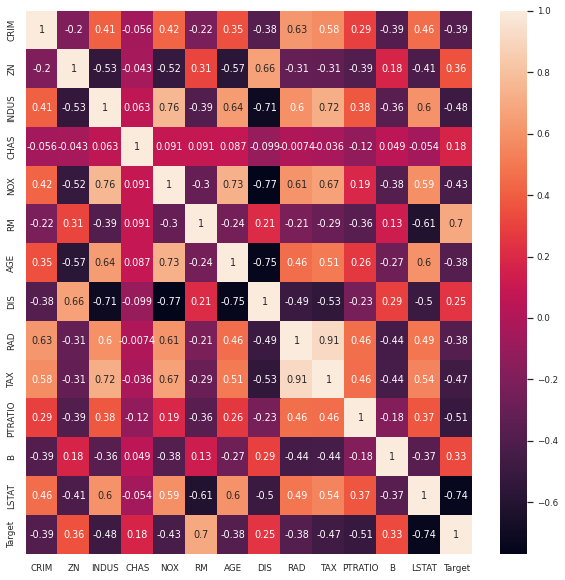

In [13]:
df_corr = df.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=True);
plt.show()

In [15]:
corr_order = df_corr.loc[:'LSTAT', 'Target'].abs().sort_values(ascending=False)
corr_order

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [16]:
plot_cols = ['Target', 'LSTAT', 'RM', 'PTRATIO', 'INDUS']
plot_df = df.loc[:, plot_cols]
plot_df.head()

,Target,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18


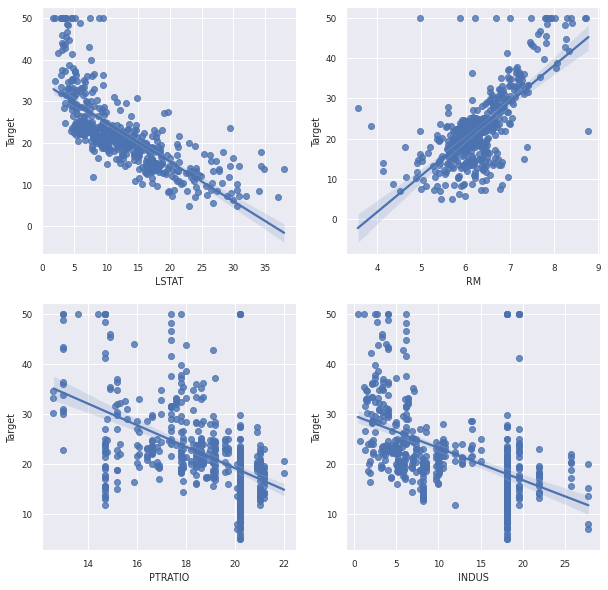

In [19]:
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
  ax1 = plt.subplot(2, 2, idx+1)
  sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=ax1)
plt.show()

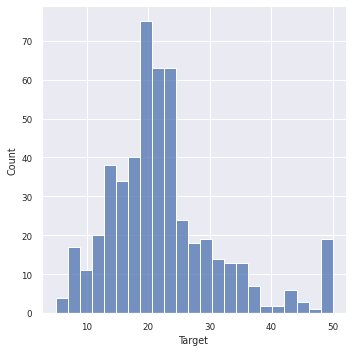

In [20]:
sns.displot(x='Target', kind='hist', data=df)
plt.show()

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
df_scaled = df.iloc[:, :-1]
scaler.fit(df_scaled)
print(df_scaled)
df_scaled = scaler.transform(df_scaled)

         CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0    0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1    0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2    0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3    0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4    0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   
..        ...   ...       ...   ...       ...       ...       ...       ...   
501  0.000633  0.00  0.420455   0.0  0.386831  0.580954  0.681771  0.122671   
502  0.000438  0.00  0.420455   0.0  0.386831  0.490324  0.760041  0.105293   
503  0.000612  0.00  0.420455   0.0  0.386831  0.654340  0.907312  0.094381   
504  0.001161  0.00  0.420455   0.0  0.386831  0.619467  0.889804  0.114514   
505  0.000462  0.00  0.420455   0.0  0.386831  0.473079  0.802266  0.125072   

          RAD       TAX   PTRATIO         B     LST

In [26]:
df.iloc[:, :-1] = df_scaled[:, :]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [32]:
from sklearn.model_selection import train_test_split
X_data = df.loc[:, ['LSTAT', 'RM']]
y_data = df.loc[:, 'Target']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=12)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 2) (404,)
(102, 2) (102,)


In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print("회귀계수(기울기): ", np.round(lr.coef_, 1))
print("상수항(절편) : ", np.round(lr.intercept_, 1))

회귀계수(기울기):  [-23.2  25.4]
상수항(절편) :  16.3


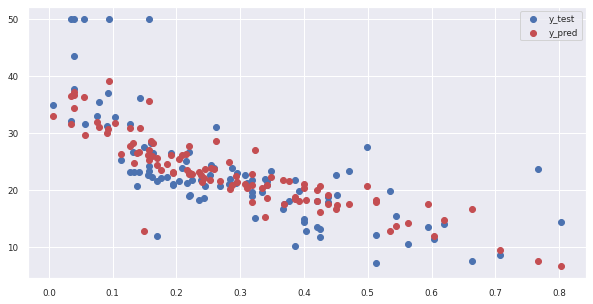

In [40]:
y_test_pred = lr.predict(X_test)

plt.figure(figsize=(10, 5))
plt.scatter(X_test['LSTAT'], y_test, label='y_test')
plt.scatter(X_test['LSTAT'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best')
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE : %.4f" %train_mse)

Train MSE : 30.8042


In [44]:
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE : %.4f" % test_mse)

Test MSE : 29.5065


In [45]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
mse_scores = -1 * cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("개별 Fold의 MSE : ", np.round(mse_scores, 4))
print("평균 MSE : %.4f" % np.mean(mse_scores))

개별 Fold의 MSE :  [31.465  34.668  28.9147 29.3535 34.6627]
평균 MSE : 31.8128


In [48]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)
print("원본 학습 데이터셋: ", X_train.shape)
print("2차 다항식 변환 데이터셋 : ", X_train_poly.shape)

원본 학습 데이터셋:  (404, 2)
2차 다항식 변환 데이터셋 :  (404, 6)


In [50]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [51]:
y_train_pred = lr.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE : %.4f" % train_mse)

Train MSE : 21.5463


In [53]:
X_test_poly = pf.fit_transform(X_test)
y_test_pred = lr.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE : %.4f" % test_mse)

Test MSE : 16.7954


In [55]:
pf = PolynomialFeatures(degree=15)
X_train_poly = pf.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_train_poly, y_train)

y_train_pred = lr.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE : %.4f" % train_mse)

X_test_poly = pf.fit_transform(X_test)
y_test_pred = lr.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE : %.4f" % test_mse)

Train MSE : 11.1589
Test MSE : 108504063264728.0625


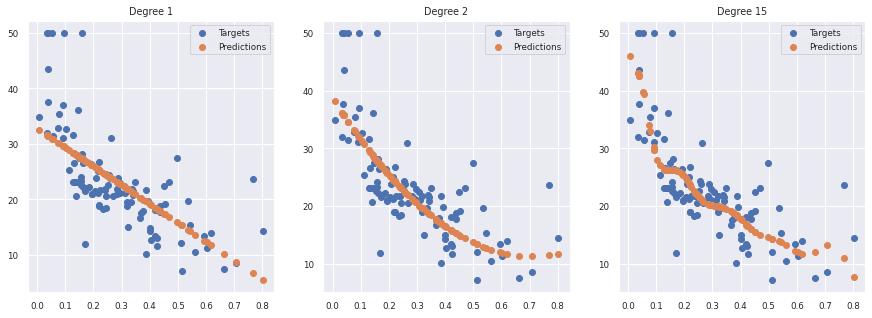

In [57]:
plt.figure(figsize=(15, 5))
for n, deg in enumerate([1, 2, 15]):
  ax1 = plt.subplot(1, 3, n+1)

  pf = PolynomialFeatures(degree=deg)
  X_train_poly = pf.fit_transform(X_train.loc[:, ['LSTAT']])
  X_test_poly = pf.fit_transform(X_test.loc[:, ['LSTAT']])
  lr = LinearRegression()
  lr.fit(X_train_poly, y_train)
  y_test_pred = lr.predict(X_test_poly)

  plt.scatter(X_test.loc[:, ['LSTAT']], y_test, label='Targets')

  plt.scatter(X_test.loc[:, ['LSTAT']], y_test_pred, label='Predictions')

  plt.title("Degree %d" %deg)

  plt.legend()

plt.show()

In [59]:
from sklearn.linear_model import Ridge
rdg = Ridge(alpha=2.5)
rdg.fit(X_train_poly, y_train)

y_train_pred = rdg.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)
y_test_pred = rdg.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 35.9484
Test MSE: 42.0011


In [66]:
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.05)
las.fit(X_train_poly, y_train)

y_train_pred = las.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)
y_test_pred = las.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 32.3204
Test MSE: 37.7103


In [68]:
from sklearn.linear_model import ElasticNet
ela = ElasticNet(alpha=0.01, l1_ratio=0.7)
ela.fit(X_train_poly, y_train)

y_train_pred = ela.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)
y_test_pred = ela.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 33.7551
Test MSE: 39.4968


In [69]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=3, random_state=12)
dtr.fit(X_train, y_train)

y_train_pred = dtr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE : %.4f" % train_mse)

y_test_pred = dtr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE : %.4f" %test_mse)


Train MSE : 18.8029
Test MSE : 17.9065


In [73]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=3, random_state=12)
rfr.fit(X_train, y_train)

y_train_pred = rfr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE : %.4f" %train_mse)

y_test_pred = rfr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE : %.4f" % test_mse)

Train MSE : 16.0201
Test MSE : 17.7751


In [74]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(objective='reg:squarederror', max_depth=3, random_state=12)
xgbr.fit(X_train, y_train)

y_train_pred = xgbr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

y_test_pred = xgbr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE : %.4f" %test_mse)

Train MSE: 8.2326
Test MSE : 18.0318
